In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from matplotlib import style 
style.use('ggplot')
import re 
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


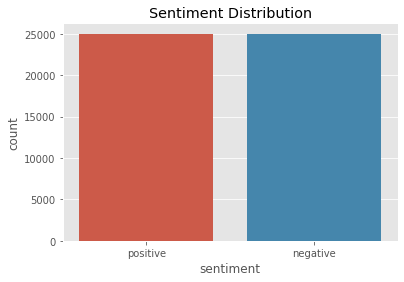

In [7]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')
plt.show()

In [8]:
for i in range(5):
    print('Review:',[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment:",df['sentiment'].iloc[i],"\n\n")

Review: [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

In [10]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [11]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


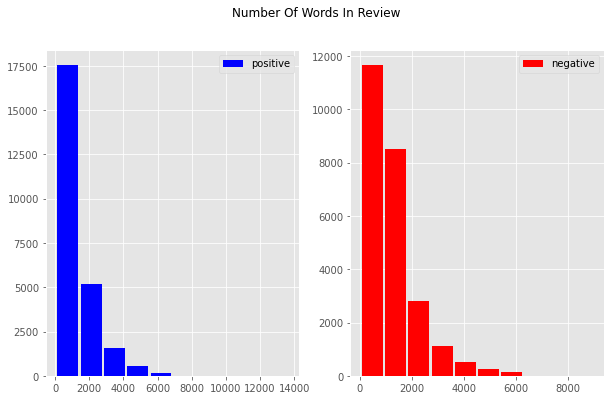

In [12]:
fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(),label='positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(),label='negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number Of Words In Review")
plt.show()

In [13]:
df.sentiment.replace('positive',1,inplace=True)
df.sentiment.replace('negative',2,inplace=True)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [20]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br/>','',text)
    text = re.sub(r"https\S+|www\S+|http\S+",'',text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return "".join(filtered_text)

In [21]:
df.review = df['review'].apply(data_processing)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Muhammad Mudassir/nltk_data'
    - 'c:\\Users\\Muhammad Mudassir\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\Muhammad Mudassir\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\Muhammad Mudassir\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\Muhammad Mudassir\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [22]:
duplicated_count = df.duplicated().sum()
print('Number of duplicate entries:', duplicated_count)

Number of duplicate entries: 418


In [23]:
df = df.drop_duplicates('review')

In [24]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word)for word in data]
    return data

In [25]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))

In [26]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [27]:
pos_reviews = df[df.sentiment == 1 ]
pos_reviews.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
5,"Probably my all-time favorite movie, a story o...",1,119


In [28]:
text = ''.join([word for word in pos_reviews['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500,width=1600,height=800).generate(text)
plt.axis('off')
plt.title('Most frequent words in positive reviews',fontsize=19)
plt.show()

NameError: name 'WordCloud' is not defined

<Figure size 1440x1080 with 0 Axes>

In [29]:
from collections import Counter 
count = Counter()
for text in pos_reviews['review'].values: 
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('the', 290932),
 ('and', 165372),
 ('a', 155251),
 ('of', 148673),
 ('to', 127921),
 ('is', 107829),
 ('in', 90145),
 ('that', 62191),
 ('I', 61914),
 ('it', 53162),
 ('this', 51403),
 ('/><br', 48800),
 ('as', 46419),
 ('with', 43153),
 ('was', 41934)]

In [30]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

,word,count
0,the,290932
1,and,165372
2,a,155251
3,of,148673
4,to,127921


In [31]:
px.bar(pos_words,x='count',y='word',title='Common Words In Positive Reviews')

In [32]:
neg_reviews = df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,Basically there's a family where a little boy ...,2,138
7,"This show was an amazing, fresh & innovative i...",2,174
8,Encouraged by the positive comments about this...,2,130
10,Phil the Alien is one of those quirky films wh...,2,96
11,I saw this movie when I was about 12 when it c...,2,180


In [33]:
text = ''.join([word for word in neg_reviews['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud = WordCloud(max_words = 500,width=1600,height=800).generate(text)
plt.axis('off')
plt.title('Most frequent words in Negative reviews',fontsize=19)
plt.show()

NameError: name 'WordCloud' is not defined

<Figure size 1440x1080 with 0 Axes>

In [34]:

count = Counter()
for text in neg_reviews['review'].values: 
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('the', 273542),
 ('a', 149568),
 ('and', 134388),
 ('of', 132924),
 ('to', 131974),
 ('is', 93846),
 ('in', 78593),
 ('I', 69449),
 ('that', 63687),
 ('this', 61414),
 ('it', 53956),
 ('/><br', 51411),
 ('was', 49969),
 ('for', 39373),
 ('with', 38797)]

In [35]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

,word,count
0,the,273542
1,a,149568
2,and,134388
3,of,132924
4,to,131974


In [36]:
px.bar(neg_words,x='count',y='word',title='Common Words In Negative Reviews')

In [37]:
X = df['review']
Y = df['sentiment']

In [38]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

NameError: name 'TfidfVectorizer' is not defined

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3 , random_state=42)


In [41]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:', (y_test.shape))

Size of x_train: (34707,)
Size of y_train: (34707,)
Size of x_test: (14875,)
Size of y_test: (14875,)


In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 
import warnings 
warnings.filterwarnings('ignore')


In [54]:
X=df['review']
y=df['sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [55]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test Accuracy:{:.2f}%'.format(logreg_acc*100))

ValueError: could not convert string to float: 'The Blob starts with one of the most bizarre theme songs ever, sung by an uncredited Burt Bacharach of all people! You really have to hear it to believe it, The Blob may be worth watching just for this song alone & my user comment summary is just a little taste of the classy lyrics... After this unnerving opening credits sequence The Blob introduces us, the viewer that is, to Steve Andrews (Steve McQueen as Steven McQueen) & his girlfriend Jane Martin (Aneta Corsaut) who are parked on their own somewhere & witness what looks like a meteorite falling to Earth in nearby woods. An old man (Olin Howland as Olin Howlin) who lives in a cabin also sees it & goes to investigate, he finds a crater & a strange football sized rock which splits open when he unwisely pokes it with a stick. Laying in the centre of the meteorite is a strange jelly like substance which sticks to the stick, if you know what I mean! It then slides up the stick & attachés itself to the old man\'s hand. Meanwhile Steve & Jane are quietly driving along minding their own business when the old man runs out in front of Steve\'s car, Steve being a decent kinda guy decides to take the old man to Dr. T. Hallan (Alden \'Stephen\' Chase as Steven Chase) at the local surgery. Dr. Hallan says he doesn\'t know what the substance on the old man\'s hand is but it\'s getting bigger & asks Steve to go back where he found him & see if he can find out what happened. Steve agrees but doesn\'t come up with anything & upon returning to Dr. Hallan\'s surgery he witnesses the blob devouring him. The town\'s police, Lieutenant Dave (Earl Rowe) & the teenage hating Sergeant Jim Bert (John Benson) unsurprisingly don\'t believe a word of it & end up suspecting Steve & his mates Al (Anthony Franke), Tony (Robert Fields) & someone called \'Mooch\' Miller (James Bonnet) of playing an elaborate practical joke on the police department. However as the blob continues to eat it\'s way through the town Steve sets about finding proof of it\'s existence & convincing the police about the threat it posses not just to their town but the entire world!<br /><br />Directed Irvin S. Yeaworth Jr. & an uncredited Russell S. Doughton Jr. I was throughly disappointed by this, the original 1958 version of The Blob. The script by Kay Linaker as Kate Phillips & Theodore Simonson is an absolute bore & extremely dull not making the most of it\'s strongest aspects. The Blob focuses on the tiresome dramatics & conflicts between the teenagers & police, in fact the majority of The Blob is spent on Steve trying to convince the police of the blob\'s existence. For most of the film the blob itself almost seems inconsequential & somewhat forgotten. It only has two or three scenes for the fist hour & a bit until the less than exciting climax when the adults & teenagers have to work together to defeat the blob & have a new found appreciation of each other afterwards, yuck! Why couldn\'t the blob just eat the lot of \'em? No explanation is given for what the blob is or it\'s origins other than it came from space, how long did it take them to come up with that? The dialogue is clunky & silly as well, as are people\'s actions & decision making, I love the part when a nurse named Kate (Lee Paton as Lee Payton, did anyone use their real name in this thing?) is confronted by the blob, she throws some acid over it & calmly proclaims "Doctor, nothing will stop it!", how does she know \'nothing\' will stop it exactly? There\'s no blood or violence so don\'t worry about that, the special effects on the blob itself aren\'t too bad considering but it barely has any screen time & moves very slowly, a bit like the film in general actually. The acting is terrible, McQueen is supposed to be a teenager when in reality he was 28 years old & it shows, he looks old enough to be his own dad! Same thing goes for most of the other \'teenage\' cast members & everyone generally speaking are wooden & unconvincing in their roles. Technically The Blob is very basic, dark static photography, dull direction & forgettable production values. The Blob is one of those films that probably sounds good on paper & is well known as being a \'classic\' but is in actual fact a huge disappointment when finally seen. This is one case when the remake The Blob (1988) is definitely better than the original. The original Blob is slow & boring & the remake isn\'t, the original Blob contains no blood or gore & the remake does, the original Blob has incredibly poor acting & casting decisions & the remake doesn\'t & the original Blob itself gets very little screen time eating only three or four people throughout the entire film & the remake features the blob all the way through & it virtually eats an entire town. The choice is an easy one, the remake every time as it\'s a better film in every respect. I\'ll give the film two stars & give that wonderful main theme song one on it\'s own. Definitely not the classic many seem to make out.'

In [ ]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test , logreg_pred))

In [50]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = logreg.predict(X_test)
mnb_acc = accuracy_score(logreg_pred,y_test)
print('Test Accuracy:{:.2f}%'.format(mnb_acc*100))

ValueError: could not convert string to float: 'The Blob starts with one of the most bizarre theme songs ever, sung by an uncredited Burt Bacharach of all people! You really have to hear it to believe it, The Blob may be worth watching just for this song alone & my user comment summary is just a little taste of the classy lyrics... After this unnerving opening credits sequence The Blob introduces us, the viewer that is, to Steve Andrews (Steve McQueen as Steven McQueen) & his girlfriend Jane Martin (Aneta Corsaut) who are parked on their own somewhere & witness what looks like a meteorite falling to Earth in nearby woods. An old man (Olin Howland as Olin Howlin) who lives in a cabin also sees it & goes to investigate, he finds a crater & a strange football sized rock which splits open when he unwisely pokes it with a stick. Laying in the centre of the meteorite is a strange jelly like substance which sticks to the stick, if you know what I mean! It then slides up the stick & attachés itself to the old man\'s hand. Meanwhile Steve & Jane are quietly driving along minding their own business when the old man runs out in front of Steve\'s car, Steve being a decent kinda guy decides to take the old man to Dr. T. Hallan (Alden \'Stephen\' Chase as Steven Chase) at the local surgery. Dr. Hallan says he doesn\'t know what the substance on the old man\'s hand is but it\'s getting bigger & asks Steve to go back where he found him & see if he can find out what happened. Steve agrees but doesn\'t come up with anything & upon returning to Dr. Hallan\'s surgery he witnesses the blob devouring him. The town\'s police, Lieutenant Dave (Earl Rowe) & the teenage hating Sergeant Jim Bert (John Benson) unsurprisingly don\'t believe a word of it & end up suspecting Steve & his mates Al (Anthony Franke), Tony (Robert Fields) & someone called \'Mooch\' Miller (James Bonnet) of playing an elaborate practical joke on the police department. However as the blob continues to eat it\'s way through the town Steve sets about finding proof of it\'s existence & convincing the police about the threat it posses not just to their town but the entire world!<br /><br />Directed Irvin S. Yeaworth Jr. & an uncredited Russell S. Doughton Jr. I was throughly disappointed by this, the original 1958 version of The Blob. The script by Kay Linaker as Kate Phillips & Theodore Simonson is an absolute bore & extremely dull not making the most of it\'s strongest aspects. The Blob focuses on the tiresome dramatics & conflicts between the teenagers & police, in fact the majority of The Blob is spent on Steve trying to convince the police of the blob\'s existence. For most of the film the blob itself almost seems inconsequential & somewhat forgotten. It only has two or three scenes for the fist hour & a bit until the less than exciting climax when the adults & teenagers have to work together to defeat the blob & have a new found appreciation of each other afterwards, yuck! Why couldn\'t the blob just eat the lot of \'em? No explanation is given for what the blob is or it\'s origins other than it came from space, how long did it take them to come up with that? The dialogue is clunky & silly as well, as are people\'s actions & decision making, I love the part when a nurse named Kate (Lee Paton as Lee Payton, did anyone use their real name in this thing?) is confronted by the blob, she throws some acid over it & calmly proclaims "Doctor, nothing will stop it!", how does she know \'nothing\' will stop it exactly? There\'s no blood or violence so don\'t worry about that, the special effects on the blob itself aren\'t too bad considering but it barely has any screen time & moves very slowly, a bit like the film in general actually. The acting is terrible, McQueen is supposed to be a teenager when in reality he was 28 years old & it shows, he looks old enough to be his own dad! Same thing goes for most of the other \'teenage\' cast members & everyone generally speaking are wooden & unconvincing in their roles. Technically The Blob is very basic, dark static photography, dull direction & forgettable production values. The Blob is one of those films that probably sounds good on paper & is well known as being a \'classic\' but is in actual fact a huge disappointment when finally seen. This is one case when the remake The Blob (1988) is definitely better than the original. The original Blob is slow & boring & the remake isn\'t, the original Blob contains no blood or gore & the remake does, the original Blob has incredibly poor acting & casting decisions & the remake doesn\'t & the original Blob itself gets very little screen time eating only three or four people throughout the entire film & the remake features the blob all the way through & it virtually eats an entire town. The choice is an easy one, the remake every time as it\'s a better film in every respect. I\'ll give the film two stars & give that wonderful main theme song one on it\'s own. Definitely not the classic many seem to make out.'

In [ ]:
print(confusion_matrix(y_test,mnb_pred))
print("\n")
print(classification_report(y_test , mnb_pred))

In [51]:
svc = LinearSVC()
svc.fit(X_train,y_train)
svc_pred = logreg.predict(X_test)
svc_acc = accuracy_score(logreg_pred,y_test)
print('Test Accuracy:{:.2f}%'.format(svc_acc*100))

ValueError: could not convert string to float: 'The Blob starts with one of the most bizarre theme songs ever, sung by an uncredited Burt Bacharach of all people! You really have to hear it to believe it, The Blob may be worth watching just for this song alone & my user comment summary is just a little taste of the classy lyrics... After this unnerving opening credits sequence The Blob introduces us, the viewer that is, to Steve Andrews (Steve McQueen as Steven McQueen) & his girlfriend Jane Martin (Aneta Corsaut) who are parked on their own somewhere & witness what looks like a meteorite falling to Earth in nearby woods. An old man (Olin Howland as Olin Howlin) who lives in a cabin also sees it & goes to investigate, he finds a crater & a strange football sized rock which splits open when he unwisely pokes it with a stick. Laying in the centre of the meteorite is a strange jelly like substance which sticks to the stick, if you know what I mean! It then slides up the stick & attachés itself to the old man\'s hand. Meanwhile Steve & Jane are quietly driving along minding their own business when the old man runs out in front of Steve\'s car, Steve being a decent kinda guy decides to take the old man to Dr. T. Hallan (Alden \'Stephen\' Chase as Steven Chase) at the local surgery. Dr. Hallan says he doesn\'t know what the substance on the old man\'s hand is but it\'s getting bigger & asks Steve to go back where he found him & see if he can find out what happened. Steve agrees but doesn\'t come up with anything & upon returning to Dr. Hallan\'s surgery he witnesses the blob devouring him. The town\'s police, Lieutenant Dave (Earl Rowe) & the teenage hating Sergeant Jim Bert (John Benson) unsurprisingly don\'t believe a word of it & end up suspecting Steve & his mates Al (Anthony Franke), Tony (Robert Fields) & someone called \'Mooch\' Miller (James Bonnet) of playing an elaborate practical joke on the police department. However as the blob continues to eat it\'s way through the town Steve sets about finding proof of it\'s existence & convincing the police about the threat it posses not just to their town but the entire world!<br /><br />Directed Irvin S. Yeaworth Jr. & an uncredited Russell S. Doughton Jr. I was throughly disappointed by this, the original 1958 version of The Blob. The script by Kay Linaker as Kate Phillips & Theodore Simonson is an absolute bore & extremely dull not making the most of it\'s strongest aspects. The Blob focuses on the tiresome dramatics & conflicts between the teenagers & police, in fact the majority of The Blob is spent on Steve trying to convince the police of the blob\'s existence. For most of the film the blob itself almost seems inconsequential & somewhat forgotten. It only has two or three scenes for the fist hour & a bit until the less than exciting climax when the adults & teenagers have to work together to defeat the blob & have a new found appreciation of each other afterwards, yuck! Why couldn\'t the blob just eat the lot of \'em? No explanation is given for what the blob is or it\'s origins other than it came from space, how long did it take them to come up with that? The dialogue is clunky & silly as well, as are people\'s actions & decision making, I love the part when a nurse named Kate (Lee Paton as Lee Payton, did anyone use their real name in this thing?) is confronted by the blob, she throws some acid over it & calmly proclaims "Doctor, nothing will stop it!", how does she know \'nothing\' will stop it exactly? There\'s no blood or violence so don\'t worry about that, the special effects on the blob itself aren\'t too bad considering but it barely has any screen time & moves very slowly, a bit like the film in general actually. The acting is terrible, McQueen is supposed to be a teenager when in reality he was 28 years old & it shows, he looks old enough to be his own dad! Same thing goes for most of the other \'teenage\' cast members & everyone generally speaking are wooden & unconvincing in their roles. Technically The Blob is very basic, dark static photography, dull direction & forgettable production values. The Blob is one of those films that probably sounds good on paper & is well known as being a \'classic\' but is in actual fact a huge disappointment when finally seen. This is one case when the remake The Blob (1988) is definitely better than the original. The original Blob is slow & boring & the remake isn\'t, the original Blob contains no blood or gore & the remake does, the original Blob has incredibly poor acting & casting decisions & the remake doesn\'t & the original Blob itself gets very little screen time eating only three or four people throughout the entire film & the remake features the blob all the way through & it virtually eats an entire town. The choice is an easy one, the remake every time as it\'s a better film in every respect. I\'ll give the film two stars & give that wonderful main theme song one on it\'s own. Definitely not the classic many seem to make out.'

In [52]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test , svc_pred))

NameError: name 'svc_pred' is not defined